<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula7a_ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Pós Graduação/3º Período (Francisco de Assis Boldt)/titanic.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Pós Graduação/3º Período (Francisco de Assis Boldt)/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
data = pd.read_csv("train.csv")
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
X = data.drop('Survived', axis=1)
X.columns
X.shape, y.shape

((891, 11), (891,))

In [14]:
indesejadas = ['PassengerId', 'Name', 'Ticket', 'Cabin']
Xdrop = X.drop(indesejadas, axis=1)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [16]:
Xnum = Xdrop.select_dtypes('number')
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [18]:
Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent") #por ser categórico não pode usar mediana
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [23]:
import numpy as np
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape

(891, 10)

In [24]:
Xtratado

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [42]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(Xtratado, y, random_state=42)
Xtr.shape, Xte.shape, ytr.shape, yte.shape

((668, 10), (223, 10), (668,), (223,))

In [44]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier()
modelo.fit(Xtratado, y)
knn_pred = modelo.predict(Xte)
knn_hits = knn_pred == yte
knn_hits, sum(knn_hits)/len(knn_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.8430493273542601)

In [27]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(Xtratado, y)
gnb_pred = modelo.predict(Xte)
gnb_hits = gnb_pred == yte
gnb_hits, sum(gnb_hits)/len(gnb_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.7847533632286996)

In [28]:
from sklearn.linear_model import Perceptron
modelo = Perceptron()
modelo.fit(Xtratado, y)
per_pred = modelo.predict(Xte)
per_hits = per_pred == yte
per_hits, sum(per_hits)/len(per_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.757847533632287)

In [29]:
import numpy as np
hits = np.stack((knn_hits, gnb_hits, per_hits))
hits.T

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True, False],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [False, False, False],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [False, False, False],
       [ T

In [30]:
ypred = np.stack((knn_pred, gnb_pred, per_pred))
ypred.T

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0,

In [ ]:
from scipy import stats
vote_pred = stats.mode(ypred)[0]
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False]),
 0.91)

#Combinação de Classificadores

In [31]:
from sklearn.ensemble import VotingClassifier
modelo = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('per', Perceptron())
])
modelo.fit(Xtratado, y)
vote_pred = modelo.predict(Xte)
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.820627802690583)

In [32]:
from sklearn.ensemble import VotingClassifier
modelo = VotingClassifier([
    ('knn1', KNeighborsClassifier(1)),
    ('knn5', KNeighborsClassifier(5)),
    ('knn9', KNeighborsClassifier(9)),
])
modelo.fit(Xtratado, y)
vote_pred = modelo.predict(Xte)
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.8699551569506726)

In [33]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(Xtratado, y)
dtc_pred = modelo.predict(Xte)
dtc_hits = dtc_pred == yte
dtc_hits, sum(dtc_hits)/len(dtc_hits)

(709    True
 439    True
 840    True
 720    True
 39     True
        ... 
 880    True
 425    True
 101    True
 199    True
 424    True
 Name: Survived, Length: 223, dtype: bool,
 0.9955156950672646)

In [35]:
from sklearn.model_selection import cross_validate
scores = cross_validate(DecisionTreeClassifier(), Xtratado, y)
np.mean(scores['test_score']), scores['test_score']

(0.7845458539953549,
 array([0.75418994, 0.80898876, 0.81460674, 0.73595506, 0.80898876]))

In [36]:
from sklearn.ensemble import VotingClassifier
modelo = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('dtc', DecisionTreeClassifier())
])
modelo.fit(Xtratado, y)
vote_pred = modelo.predict(Xte)
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.9237668161434978)

In [37]:
from sklearn.ensemble import VotingClassifier
modelo = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('per', Perceptron()),
    ('dtc', DecisionTreeClassifier())
])
modelo.fit(Xtratado, y)
vote_pred = modelo.predict(Xte)
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.9192825112107623)

In [38]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(splitter='random')
modelo.fit(Xtratado, y)
dtc_pred = modelo.predict(Xte)
dtc_hits = dtc_pred == yte
dtc_hits, sum(dtc_hits)/len(dtc_hits)

(709    True
 439    True
 840    True
 720    True
 39     True
        ... 
 880    True
 425    True
 101    True
 199    True
 424    True
 Name: Survived, Length: 223, dtype: bool,
 0.9955156950672646)

#Diversificação da Amostragem

In [39]:
from sklearn.ensemble import BaggingClassifier
modelo = BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                           n_estimators=100, max_features=0.15, random_state=42)
modelo.fit(Xtratado, y)
bag_pred = modelo.predict(Xte)
bag_hits = bag_pred == yte
bag_hits, sum(bag_hits)/len(bag_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880    False
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.8071748878923767)

In [45]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)
modelo.fit(Xtratado, y)
rfc_pred = modelo.predict(Xtratado)
rfc_hits = rfc_pred == y
rfc_hits, sum(rfc_hits)/len(rfc_hits)

(0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 886    True
 887    True
 888    True
 889    True
 890    True
 Name: Survived, Length: 891, dtype: bool,
 0.9797979797979798)

In [47]:
scores = cross_validate(RandomForestClassifier(random_state=42), Xtratado, y)
np.mean(scores['test_score']), scores

(0.8103571652752495,
 {'fit_time': array([0.78496456, 0.80311584, 0.86283588, 0.82143974, 0.52338362]),
  'score_time': array([0.03064823, 0.02902269, 0.03924847, 0.05225635, 0.01700568]),
  'test_score': array([0.78212291, 0.80898876, 0.85393258, 0.78089888, 0.8258427 ])})

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(random_state=42)
modelo.fit(Xtratado, y)
etc_pred = modelo.predict(Xte)
etc_hits = etc_pred == yte
etc_hits, sum(etc_hits)/len(etc_hits)

(709    True
 439    True
 840    True
 720    True
 39     True
        ... 
 880    True
 425    True
 101    True
 199    True
 424    True
 Name: Survived, Length: 223, dtype: bool,
 0.9955156950672646)

In [49]:
scores = cross_validate(ExtraTreesClassifier(random_state=42), Xtratado, y)
np.mean(scores['test_score']), scores

(0.7935157868307074,
 {'fit_time': array([0.41872287, 0.49789381, 0.64623117, 0.30131316, 0.26626253]),
  'score_time': array([0.03363061, 0.05312777, 0.01929164, 0.01702452, 0.01808596]),
  'test_score': array([0.77094972, 0.7752809 , 0.83707865, 0.78089888, 0.80337079])})

In [55]:
from sklearn.ensemble import AdaBoostClassifier
modelo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=25, splitter='random'),
                            learning_rate=0.15, random_state=42)
modelo.fit(Xtratado, y)
abc_pred = modelo.predict(Xte)
abc_hits = abc_pred == yte
abc_hits, sum(abc_hits)/len(abc_hits)

(709    True
 439    True
 840    True
 720    True
 39     True
        ... 
 880    True
 425    True
 101    True
 199    True
 424    True
 Name: Survived, Length: 223, dtype: bool,
 0.9955156950672646)

In [57]:
modelo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=25, splitter='random'),
                            learning_rate=0.15, random_state=42)
scores = cross_validate(modelo, Xtratado, y)
np.mean(scores['test_score']), scores

(0.7968740192078337,
 {'fit_time': array([0.25922155, 0.25418758, 0.23812771, 0.55336285, 0.49343944]),
  'score_time': array([0.02208591, 0.02162194, 0.02276969, 0.01984715, 0.04114795]),
  'test_score': array([0.78212291, 0.7752809 , 0.82022472, 0.78651685, 0.82022472])})

In [58]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import StackingClassifier

voting = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('per', Perceptron())
])

modelo = StackingClassifier([
    ('voting', voting),
    ('extrat', ExtraTreesClassifier()),
    ('ranfor', RandomForestClassifier())
], cv=3, passthrough=True)

modelo.fit(Xtratado, y)
stack_pred = modelo.predict(Xte)
stack_hits = stack_pred == yte
stack_hits, sum(stack_hits)/len(stack_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.905829596412556)

In [59]:
scores = cross_validate(modelo, Xtratado, y)
np.mean(scores['test_score']), scores

(0.8125855250768941,
 {'fit_time': array([2.82209349, 2.88758922, 2.52228022, 2.42722797, 1.54134035]),
  'score_time': array([0.11217928, 0.04773784, 0.06324244, 0.04615617, 0.0475359 ]),
  'test_score': array([0.79888268, 0.80898876, 0.83146067, 0.80898876, 0.81460674])})

In [63]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = y
submission.to_csv('ensamble_submission.csv', index=False)

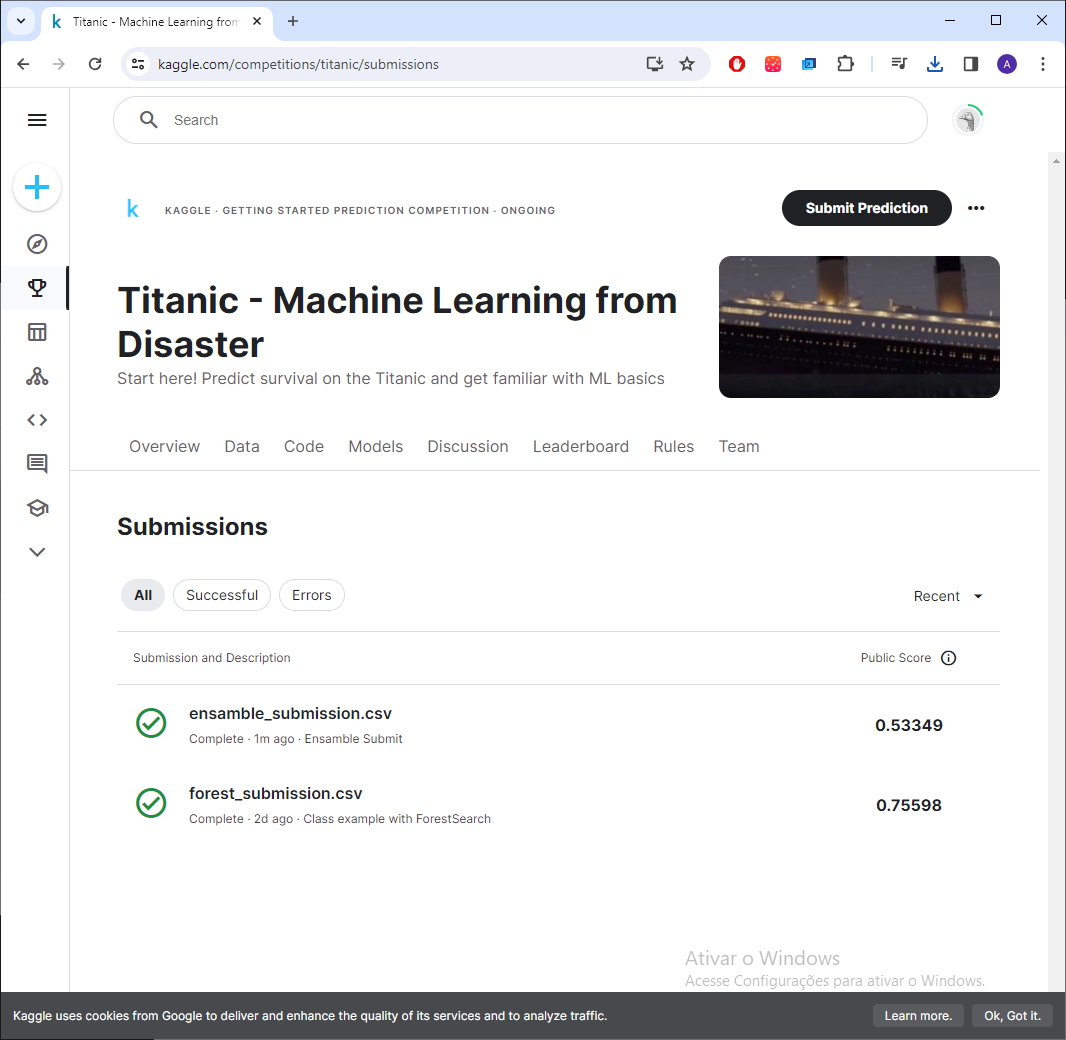